# Описание проекта

У нас есть данные магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нам нужно выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Много пропусков в столбцах с годом релиза, оценка критиков и пользователей и с рейтингами. По два пропуска с именем и жанром игры. Поскольку нам необходима актуальная информация об игровой индустрии, посмотрим на годы релизов. 

In [3]:
print(df['Year_of_Release'].min())
df['Year_of_Release'].max()

1980.0


2016.0

Полагаю, что игры выпущенные 1980 году не очень нам помогут в анализе данных. Учитывая скорость развития индустрии, полагаю взять данные за последние несколько лет. Посмотрим на количество игр, реализуемых по годам, возможна нам эта информация поможет в определнии выборки:

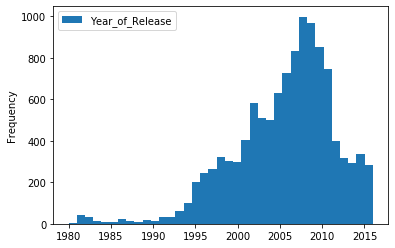

In [4]:
df_year_pivot = df.pivot_table(index='Name', values='Year_of_Release')
df_year_pivot.plot(kind='hist', bins=37)

На графике видно что активное начало развития индустрии игр начинается в 1995 году, пологаю взять именно этот период - после 1995 года. 

## Предоработка

### Исправим названия колонок

Приведем названия колонок к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем пропуски

Начнем со стоблца с именем игры:

In [6]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки, год выпуска 1993, что нам не очень подходит, много пропущенных данных в других столбцах, стоит их удалить.

In [7]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


С годом релиза немного сложнее. Посмотрим на данные с пропусками:

In [8]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалим строки с пропусками в годе релиза

In [9]:
# вариант заполнения пропуска, выделяя год релиза из названия, например, FIFA 2004.
# напишем для этого функцию, которая берет на вход строку:
# def year_func(row):
 
#    # функция, которая будет возвращать список чисел из названия игры:
#    def year_func_loc(row):
#        num = [int(word) for word in row.split() if word.isdigit()]
#        return num
# 
#    # проверим чтобы число было было актуальным, то есть с 1995 по 2016:
#    year = None
#    for i in year_func_loc(row):
#        if 1995 <= i <= 2016:
#            year = i
#        elif 95 <= i <= 99:
#            year = i+1900
#        elif 1 <= i <= 16:
#            year = i+2000
#    return year 
# 
#df['year_of_release'] = df['year_of_release'].fillna(df['name'].apply(year_func))
#df.info()



In [10]:
df = df.dropna(subset=['year_of_release'])

In [11]:
df['year_of_release'].isna().sum()

0

Посмотрим на пропуски в столбцах с оценками критиков и пользователей:

In [12]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропуски в этих столбцах я считаю не стоит заполнять, так как самым логичным я вижу - это заполнение средним значением по жанру и платформе. Но усреднение игр может оказаться совсем неправдоподобным, так как одна и та же игра может вызывать совершенно разные отклик на разных платформах. В боевые игры удобнее играть на консоли, а симулятор вождения удобнее подключать к ПК. 

Пропуски в колонке с оценкой пользователей мы удалим позже, перед проверкой гипотез, дабы не исказить исследование. 

Отдельного внимания заслуживает тип данных в колонке с оценками пользователей - "tbd". В поиске на просторах интернет нашел информацию этой аббревиатуры, которая переводится как "To Be Determined", что означет "будет определено". То есть у игр с данной аббревиатурой нет рейтинга, посколько количество оценок еще сесьма мало, и может оказаться не корректным. Исходя из вышеизложенного самым логичным вариантом обработки этих данных, на мой взгляд, будет замена их на такое же, как и пропуски, так как по большому счету это они и есть. 

Заменим "tbd" на NaN. (Многие товарищи по кагорте предлагают заменить на -1, но это может повлиять на вычисление среднего значения в оценке)


In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Столбец rating указывает на рейтинг от организации ESRB. Его менять или заполнять уж точне не стоит, так как врядли мы можем взять на себя такую ответственность, так как он определяет возрастной ценз пользователей. 

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Просто заменим пропуски на обозначения отсутствия определения рейтинга - "No Determined"

In [16]:
df['rating'] = df['rating'].fillna('No Determined')
print(df['rating'].unique())
df.info()

['E' 'No Determined' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             16444 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Дубликаты

Не будем забывать про возможное наличие дубликатов:

In [17]:
df.duplicated().sum()

0

### Заменим тип данных

Стоит преобразовать тип данных в колонке с оценкой пользователей. Можно также подумать с преобразованием года релиза, но в datetime нет необходимости преобразовывать, так как нет информации о месяце и дне, поэтому преобразуем в целочисленный формат. 

In [18]:
# меняем формат оценки пользователей на численный:
df['user_score'] = df['user_score'].astype('float')

# меняем год на целочисленный:
df['year_of_release'] = df['year_of_release'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No Determined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Determined,31.38


## Исследовательский анализ данных

### Количество игр выпущенных в разные годы

Этот шаг мы делали в обзоре данных, но неплохо освежить его в памяти:

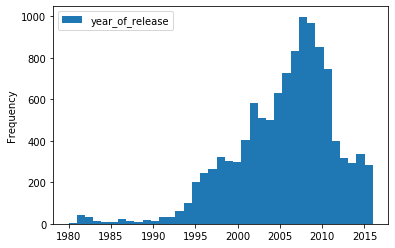

In [20]:
# построим сводную таблицу с сортировкой по году выпуска:
df_year = df.pivot_table(index='name', values='year_of_release')

# и построим график:
df_year.plot(kind='hist', bins=37)

Мы видим что в 1995 начинается "рассвет" компьютерных игр. Это связано с появлением полноценных 3D игр, появились новые жанры - шутер от первого лица, стратегия в реальном времени и MMO. Этому предшествовало появление 22 марта 1993 года Pentium 1, что повысило пользовтельские мощности и компьютеры в целом начинали появляться не только в лаборатариях и НИИ, но и у частных лиц, компьютеры стали более доступны. Спад популярности в после 2008 года можно объяснить внедрением в жизнь смартфонов и появлением социальных сетей, у людей сместился акцент интересов и на игры оставалось меньше времени. Посмотрим, есть ли игры для мобильных устройств в нашем наборе данных?

In [21]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Для телефонов были распространены игры на платформах J2ME iOS Android DoJa BREW. Как мы видим у нас их нет. 

### Продажи по платформам

Нам нужно изучить данные о популярности различных платформ в разные годы. 
Создадим сводную таблицу по платформам. 

In [22]:
# сводник
df_pivot_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
df_pivot_platform.reset_index().sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


В лидерах у нас PlayStation 2. Соберем первые платформы и посмотрим на распределение по годам.

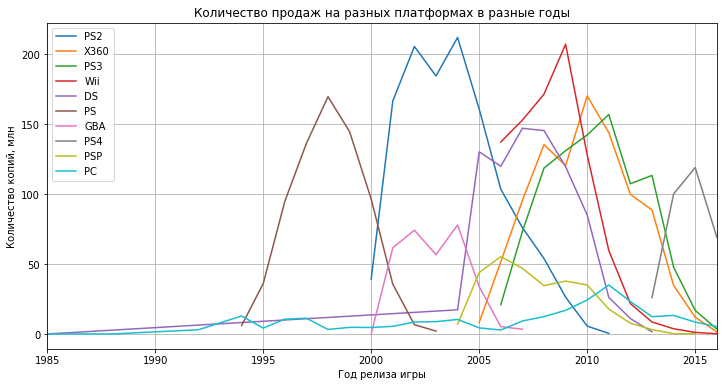

In [23]:
# создадим список самых успешных платформ:
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

# напишем цикл для построения графиков в зависимости от платформы и суммы продаж:
for platform in platform_list:
    (df[df['platform'] == platform].groupby('year_of_release')['total_sales']
     .sum().plot(label=platform, grid=True, figsize=(12,6)))
    
plt.title('Количество продаж на разных платформах в разные годы')
plt.xlabel('Год релиза игры')
plt.ylabel('Количество копий, млн')
plt.legend()
plt.show()



Исходя из графика можно сдеать вывод что в среднем каждая платформа пользуется популярностью около 10 лет. В 2015-2016 году с явным приемуществом лидирует PS4.

### Поиск актуального периода

Учитывая срок "жизни" платформы в 10 лет, и срок роста популярности платформы около 3-5 лет (опять же исходя из графика) считаю целесообразным взять данные за 2013-2016 года. Создадим новый датасет с актуальными данными.

In [24]:
df_actual = df.query('year_of_release >= 2013')
df_actual['year_of_release'].unique()

array([2013, 2015, 2014, 2016])

И построим еще раз график, но уже используя актуальный датасет. Предварительно нужно актуализировать и список игровых платформ. Далеко не все остались "в строю".

In [25]:
# еще раз создадим сводную таблицу:
df_pivot_platform_actual = df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
df_pivot_platform_actual.reset_index().sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


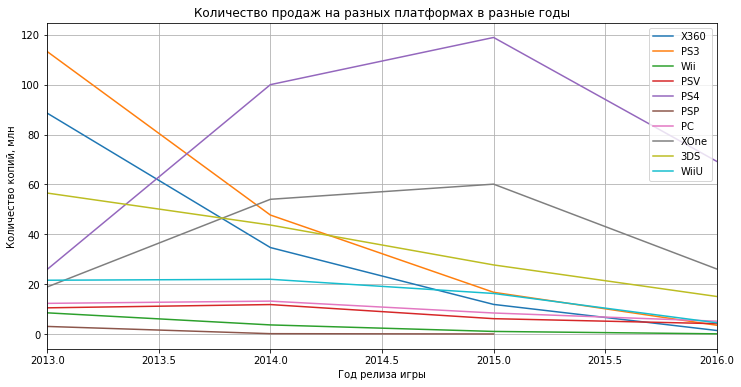

In [26]:
# создадим новый, актуальный список платформ
platform_list_actual = ['X360', 'PS3', 'Wii', 'PSV', 'PS4', 'PSP', 'PC', 'XOne', '3DS', 'WiiU']

# напишем цикл для построения графиков в зависимости от платформы и суммы продаж:
for platform in platform_list_actual:
    (df_actual[df_actual['platform'] == platform].groupby('year_of_release')['total_sales']
     .sum().plot(label=platform, grid=True, figsize=(12,6)))
    
plt.title('Количество продаж на разных платформах в разные годы')
plt.xlabel('Год релиза игры')
plt.ylabel('Количество копий, млн')
plt.legend()
plt.show()


Лидер у нас PS4, на втором месте XOne, третий 3DS. Видно что продажи на всех платформах падают с 2015 года. Это говорит об спаде спроса в  индустрии в целом. Но также в прошлые годы внушительные результаты были у PS3 и X360. Итак рейтинг таков:

1. PS4
2. XOne
3. 3DS
4. PS3
5. X360

Видно что PS-ки пользуются спросом каждая в свое время. Вспомним что абсолютный лидер по продажам тоже PS - это PS2. Если будет анонс новых PS, я бы явно ставил на них. 

### "Ящик с усами"

Построим "ящик с усами" по глобальным продажам в разбивке по платформам:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


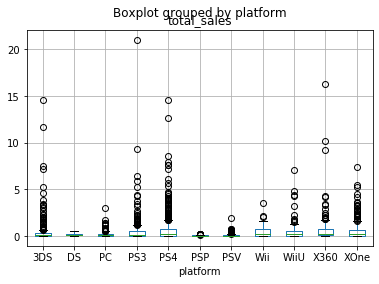

In [27]:
df_actual.boxplot('total_sales', by='platform')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Для такого большого разброса удобно использовать логарифмический масштаб по оси Y. Точные значения там будет смотреть не очень удобно, но общую картину увидим
</div>

Достаточно онформативно получилось. Можно сделать несколько выводов.

1. На некоторых платформах есть игры, которые сильно выделяются по количеству копий. Лидер - PS3, который имеет игру более 20 млн копий, учитывая что среднее значение менее 1 млн копий. На втором месте X360, имеет игру с более 16 млн копий. На третьем месте PS4 и 3DS, чуть менее 15 млн копий. 

2. Почти на всех платформах есть такая игра - джек-пот, но есть и очень скромные платформы. на PC, PSV, Wii, таких игр 1-3. На платформах DS и PSP удачных игр, выбивающихся из основной массы нет вовсе. 

3. На платформах 3DS, PS3, PS4, X360 и XOne хочется отметить обилие игр, которые получают больше копий, чем основная масса игр. 

### Влияние отзывов

Предлагаю взять самую успешную платформу всех времен и народов - PS2, и на её примере посмотреть как оценки критиков и пользователей влияют на продажи. Начнем с оценки критиков:

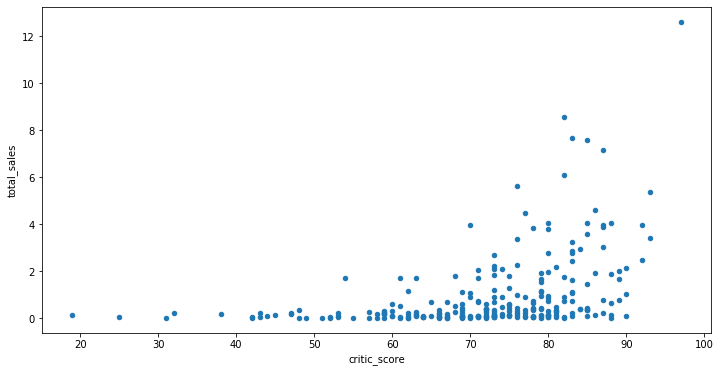

In [28]:
# создадим датасет с PS4:
df_actual_ps4 = df_actual[df_actual['platform'] == 'PS4']

# построим диаграмму рассеяния:
df_actual_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,6))

Вполне логичная взаимосвязь - чем выше оценки критиков, тем больше проданных копий - на выбор игроков явно влияет оценка критиков. Один экземпляр вообще имеет оценку более 95, и более 12 млн копий. Даже стало интересно, что это за игра...

In [29]:
df_actual_ps4.sort_values(by='critic_score', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
623,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92.0,8.6,M,2.48
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97


Да, неудивительно, нашумевшая GTA 5. Все мы в нее, наверное, играли. Теперь очередь влияния оценок игроков:

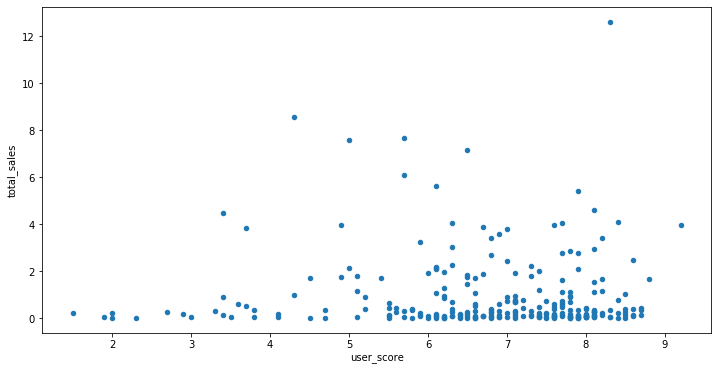

In [30]:
# построим диаграмму рассеяния по отзывам пользователей:
df_actual_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,6))

Закономерность схожая, хоть и далеко не такая очевидная. На графике хорошо видно, что продаются и не самые звездные игры. На мой взгляд это связано с тем, что игрок покупает игру, поиграв в нее, разочаровывается, и ставит плохую оценку. Посмотрим на корреляцию отзывов и продаж.

In [31]:
df_actual_ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Данные корреляции подтверждают наши выводы. Корреляция оценок критиков с количеством копий - 41%, не абсолютный, но значимый показатель. Чего не скажешь о влиянии оценок пользователей - около 3%. При выборе игры явно не стоит полагаться на пользовательские отзывы. 

Отдельно хочется отметить Японию. Если в других регионах показатели корреляции схожи с общими продажами, то продажи в Японии зависят от оценок пользователей немного меньше (на 17%), чем от оценок критиков (на 32%). Чтож, видимо в Японии очень требовательные игроки, которые прислушиваются к советам друг друга, и не напрасно. 

Соотнесем данные с другими платформами. Напишем для этого функцию.

In [32]:
# поместим в функцию рисование графиков:
def scatter_platform(df):
    df.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,2))
    df.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,2))

Создадим отфильтрованные датасеты еще по трем платформам: X360, PS3, Wii и применим к нима написанную функцию.

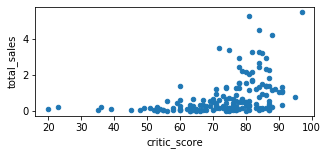

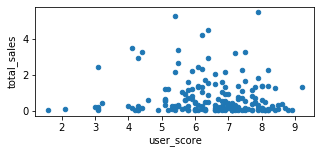

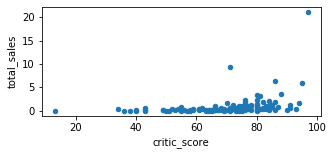

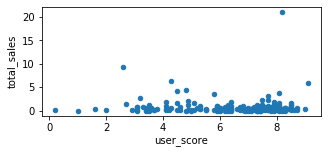

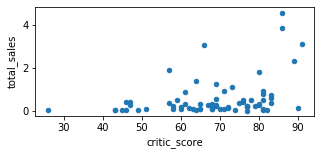

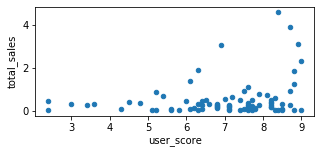

In [33]:
# создаем датасеты
df_actual_xone = df_actual[df_actual['platform'] == 'XOne']
df_actual_ps3 = df_actual[df_actual['platform'] == 'PS3']
df_actual_3ds = df_actual[df_actual['platform'] == '3DS']

# и применяем функцию
scatter_platform(df_actual_xone)
scatter_platform(df_actual_ps3)
scatter_platform(df_actual_3ds)

Результат схож с PS4. Оценка критиков больше влияет на продажи копий, чем оценка пользователей. На платформе 3DS больше сходства разниц. Посмотрим на нее на таблице коррелций:

In [34]:
df_actual_3ds.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.075933,-0.115177,-0.063487,-0.083695,0.166254,0.240047,-0.090086
na_sales,-0.075933,1.000000,0.931893,0.641878,0.993708,0.369653,0.241036,0.938867
eu_sales,-0.115177,0.931893,1.000000,0.633982,0.958274,0.268851,0.114930,0.927821
jp_sales,-0.063487,0.641878,0.633982,1.000000,0.645306,0.301810,0.259370,0.854173
other_sales,-0.083695,0.993708,0.958274,0.645306,1.000000,0.354365,0.209418,0.945649
critic_score,0.166254,0.369653,0.268851,0.301810,0.354365,1.000000,0.769536,0.357057
user_score,0.240047,0.241036,0.114930,0.259370,0.209418,0.769536,1.000000,0.241504
total_sales,-0.090086,0.938867,0.927821,0.854173,0.945649,0.357057,0.241504,1.000000


Действительно кореляция выше остальных игр. 36% у оценок критиков и 24% у оценок пользователей.

In [35]:
len(df_actual_3ds)

303

303 игры не так много, на мой взгляд, поэтому корреляция, возможно не совсем объяктивна.  

Посмотрим на корреляции по всем платформам за актуальный период:

In [36]:
df_actual.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,0.039318,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,-0.020010,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,-0.027040,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.194025,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,-0.011500,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.502221,0.313700
user_score,0.039318,-0.020010,-0.027040,0.194025,-0.011500,0.502221,1.000000,-0.002608
total_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,-0.002608,1.000000


Корреляция количества копий с отзывами в среднем ниже, критики - 31%, пользователи - 3%, которые и вовсе показывают отризательную зависимость, то есть чем хуже отзыв тем больше продаж. Но все же общая тенденция сохраняется. Отзывы критиков все равно больше влияют на продажи, чем отзывы пользователей. Но не в Японии. Здесь на общей актуализированной таблице корреляция оценок пользоватлей и вовсе выше - 19% против 13% корреляции с отзывами критиков. Ох уж эта Япония...

### Распределение игр по жанрам

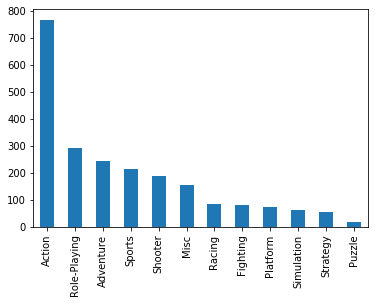

In [37]:
# топ жанров
df_actual['genre'].value_counts().plot(kind='bar')

На графике видно что абсолютный лидер это жанр "action" - многим, видимо, не хватает экшена в жизни. Ролевые игры тоже в лидерах. Тройку замыкает жанр приключений - мы стали забывать что такое настоящие приключения. Остальные игры отстают не сильно но равномерно. В конце плетутся стратегии и пазлы. 

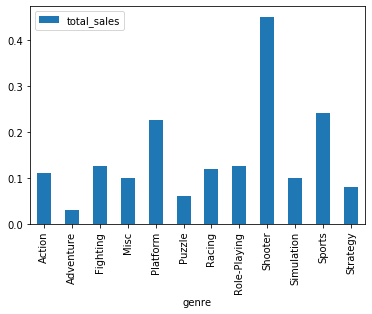

In [38]:
# топ жанров по медиане общих продаж
df_actual_pivot_genre = df_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
df_actual_pivot_genre.plot(kind='bar')

По медианным зачениям картина совсем иная. Лидером является шутер, на втором месте спортивные игры. Замыкает тройку лидеров жанр "Misc"

In [39]:
df_actual_pivot_genre.sort_values(by=['total_sales'], ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Наш экшн по медианным значениям всего лишь на 6 месте... Еще один повод подумать...

## Портрет пользователя каждого региона

### Популярные платформы

Нам нужно узнать топ игровых платформ в различных регионах

In [40]:
# сводная таблица
df_platform = df_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# таблица популярных платформ в Европе:
df_sort_platform_eu = df_platform.sort_values(by='eu_sales', ascending=False).reset_index()
df_sort_platform_eu.head()

,platform,eu_sales,jp_sales,na_sales
0,PS4,141.09,15.96,108.74
1,PS3,67.81,23.35,63.50
2,XOne,51.59,0.34,93.12
3,X360,42.52,0.51,81.66
4,3DS,30.96,67.81,38.20


Самые популяные платформы в Европе:

1. PS4
2. PS3
3. XOne
4. X360
5. 3DS

In [41]:
# таблица популярных платформ в Японии:
df_sort_platform_jp = df_platform.sort_values(by='jp_sales', ascending=False).reset_index()
df_sort_platform_jp.head()

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,PS3,67.81,23.35,63.50
2,PSV,6.10,18.59,5.04
3,PS4,141.09,15.96,108.74
4,WiiU,19.85,10.88,29.21


Самые популяные платформы в Японии:

1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

In [42]:
# таблица популярных платформ в Северной Америке:
df_sort_platform_na = df_platform.sort_values(by='na_sales', ascending=False).reset_index()
df_sort_platform_na.head()

,platform,eu_sales,jp_sales,na_sales
0,PS4,141.09,15.96,108.74
1,XOne,51.59,0.34,93.12
2,X360,42.52,0.51,81.66
3,PS3,67.81,23.35,63.50
4,3DS,30.96,67.81,38.20


Самые популяные платформы в Северной Америке:

1. PS4
2. XOne
3. X360
4. PS3
5. 3DS

Собрем в один датасет только нужные нам платформы и построим распределение по регионам. Единственный способ, по которому я смог отсортировать платформы - найти в сортировке по региону подходящий список платформ в топе, и на его основе сделать логическую фильтрацию.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56282e94d0>,
      dtype=object)

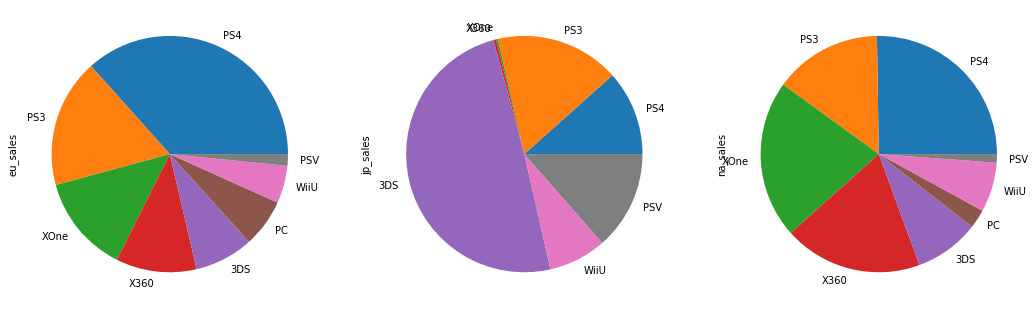

In [43]:
# соберем в таблицу только топовые платформы в каждом регионе:
df_platform = df_sort_platform_eu[df_sort_platform_eu['eu_sales'] > 6].set_index('platform')

# построим графики распределения по регионам
df_platform.plot(kind='pie', subplots='True', figsize=(18,19), legend=False)

- В Европе преобладает PS4 (синий цвет на графике), который также лидирует в Северной Америке. В Японии он занимает явно не лидирующее место. 
- PS3 разбит примерно равными долями по регионам.
- XOne имеет бОльшую долю в Северной Америке, чем в Европе. В Японии его вообще не видно. 
- X360 имеет примерно схожие соотношения, но в меньших количетсвах.
- WiiU занимает скромную позицию, но распределен по всем зонам одинаково.
- PSV любят больше в Японии, причем намного.
- 3DS явный фаворит Японии, занимает практически половину рынка видеоигр. В остальных регионах заметен но очень скромен. 

### Популярные жанры

Выделим подобным с платформами способом приоритет жанров в разных регионах. 

In [44]:
# сводная таблица
df_genre = df_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# таблица популярных платформ в Европе:
df_sort_genre_eu = df_genre.sort_values(by='eu_sales', ascending=False).reset_index()
df_sort_genre_eu.head()

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Shooter,87.86,6.61,109.74
2,Sports,60.52,5.41,65.27
3,Role-Playing,36.97,51.04,46.40
4,Racing,20.19,2.30,12.96


In [45]:
# таблица популярных платформ в Японии:
df_sort_genre_jp = df_genre.sort_values(by='jp_sales', ascending=False).reset_index()
df_sort_genre_jp.head()

,genre,eu_sales,jp_sales,na_sales
0,Role-Playing,36.97,51.04,46.40
1,Action,118.13,40.49,126.05
2,Misc,20.04,9.20,27.49
3,Fighting,8.55,7.65,15.55
4,Shooter,87.86,6.61,109.74


In [46]:
# таблица популярных платформ в Северной Америке:
df_sort_genre_na = df_genre.sort_values(by='na_sales', ascending=False).reset_index()
df_sort_genre_na.head()

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Shooter,87.86,6.61,109.74
2,Sports,60.52,5.41,65.27
3,Role-Playing,36.97,51.04,46.40
4,Misc,20.04,9.20,27.49


В Европе как и в Северной Америке лидируют Action, Shooter, Sports и Role-Playing. Пятая строка немного отличается. Европа - гонки, в Северной Америке Misc. Признаюсь честно, не знаю что за жанр, даже гуглёжь не помог. А вот с Японией снова все не так как у остальных У нее рейтинг жанров выглядит следующим образом:
1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

Небольшое сходство есть с жанром "Экшн". Думаю, вполне логично, учитывая, что в общих продажах этот жанр "впереди планеты всей". Ролевые игры Японцы любят больше других регионов, как и драки ("Fighting"). Можно сделать вывод что это страна все же для нас остается загадкой. Что по долевому распределению?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5628359090>,
      dtype=object)

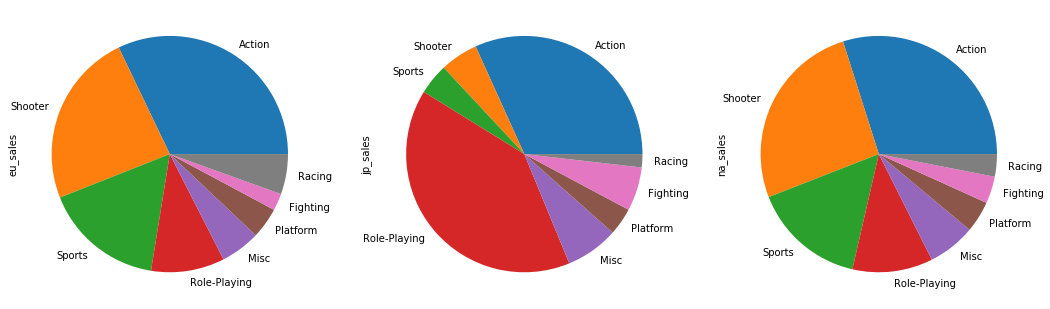

In [47]:
# отберем самые популярные жанры:
df_genre_plot = df_sort_genre_na[df_sort_genre_na['na_sales'] > 12].set_index('genre')

# и построим "пирог"
df_genre_plot.plot(kind='pie', subplots='True', figsize=(18,19), legend=False)

Action в почете везде, причем равными долями. В Японии в лидерах ролевые игры, намного больше занимают места в жизни игроков, чем в остальных регионах. Шутеры любят Европейцы и Американцы, а гонки и бои нелюбят все одинаково. 

### Влияние рейтинга ESRB

Посмотрим на сводную таблицу рейтинга от рейтингового агенства. И постараемся выявить взаимосвязь оценки и продаж в отдельном регионе. Как и в прошлых разделах все начинается со сводных таблиц.

In [48]:
# сводная таблица
df_esrb = df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
No Determined,78.91,85.05,89.42
T,41.95,20.59,49.79


Глядя на цифры на первый взгляд закономерности примерно схожи. Посмотрим как это выглядит на той же круговой диаграмме.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56280c8150>,
      dtype=object)

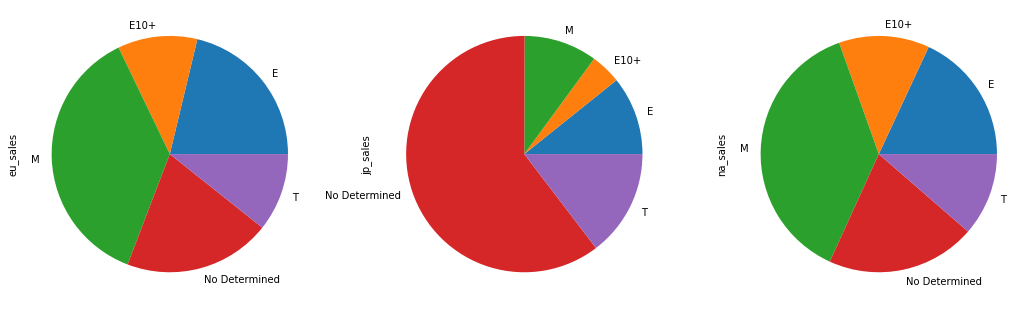

In [49]:
df_esrb.plot(kind='pie', subplots='True', figsize=(18,19), legend=False)

Весьма любопытно. Графики Европы и Северной Америки практически идентичны. Но Япония снова выделяется. В датасете были пропуски в столбце рейтинга, которые мы заменили на "No Determined". Мы видим что на Японском графике эта часть преобладает, почти 60% всех данных. В то же вермя очень мало игр с рейтингом "М" - для взрослых. И еще меньше игр для детей 10+. Может они специально не регистрируют игры в этом рейтинговом агенстве? В любом случае еще один пунктик к Японии. 

## Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Мы уже имеем двухстороннюю гипотезу, которую можно попытаться принять или не принять. Для этого сформируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Сохраним два датасета по игровым платформам, которые будем сравнивать при помощи t-теста, поскольку имеем дело с независимыми наборами данных

In [50]:
# удалим пропуски для корректной работы t-теста.
# удаляем только сейчас, потому что нам нужны были данные 
# в других столбцах,без них исслледование могло быть не корректным
df_actual = df_actual.dropna(subset=['user_score'])

# создаем две переменных
xone = df_actual[df_actual['platform'] == 'XOne']['user_score']
pc = df_actual[df_actual['platform'] == 'PC']['user_score']
results = st.ttest_ind(xone, pc)
               
# зададим стандартное пороговое значение в 5%:
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Исследование гипотезы говорит о том, что у нас нет оснований отвергнуть нулевую гипотезу. Даже если бы мы взяли альфа значение 10%, то все равно оснований для отвержения нулевой гипотезы у нас бы не было, поскольку критический уровень статистической значимости составляет 14%. Тем самым мы соглашаемся с утверждением что **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**. 

### Средние пользовательские рейтинги жанров Action  и Sports разные.

Имея утверждение "Средние пользовательские рейтинги жанров Action и Sports разные" мы можем сформировать нулевую и альтернативную гипотезы:

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports отличаются

Сохраним два датасета по игровым платформам, которые будем сравнивать при помощи t-теста, поскольку имеем дело с независимыми наборами данных

In [51]:
# создаем две переменных
action = df_actual[df_actual['genre'] == 'Action']['user_score']
sports = df_actual[df_actual['genre'] == 'Sports']['user_score']
results = st.ttest_ind(action, sports)
               
# зададим стандартное пороговое значение в 5%:
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


p-значение ничтожно мало, поэтому у нас веские основания отвергнуть нулевую гипотезу в пользу двусторонней альтернативной гипотезы, которая гласит: "Средние пользовательские рейтинги жанров Action и Sports отличаются". Данное утверждение указывает на верность изначальной гипотезы: **Средние пользовательские рейтинги жанров Action и Sports разные**. Интересно в чью пользу?

In [52]:
print('Средняя оценка пользователей в жанре Action', action.mean())
print('Средняя оценка пользователей в жанре Sports', sports.mean())

Средняя оценка пользователей в жанре Action 6.837532133676092
Средняя оценка пользователей в жанре Sports 5.238124999999999


И снова мы подтверждаем превосходство жанра Action над всеми остальными. В конкретном случае над жанром Sports на 1.6 балла. 

## Общий вывод

Это было весьма интересное, разностороннее исследование. Было познавательно заполнять пропуски исходя из названия игры, искать взаимосвязи регионов и платформ. Мы получили данные аж с 1980 года, было любопытно понастольгировать по временам, когда нас еще не было, а игры уже были... Перед нами стояла задача: "Нужно выявить определяющие успешность игры закономерности". Исходя из полученных данных, можно сделать следующие выводы:

1. В целом индустрия на конец 2016 года находится в упадке, так как продажи игр на всех платформах снижаются из года в год.

2. Sony Playsation лидирует среди всех платформ на всех фронтах. PS2 абсолютный лидер по проданным копиям игр на все время, PS4 не уступает никому по продажам последние два года, а PS3 не выходит из топ 5 платформ ни в одном регионе. Я бы точно делал ставку на PS5, PS6 и т.д.

3. Лидером среди игровых жанров является Action. И в абсолютном выражении, и в топах по регионам, везде в первых рядах. Ему уступают шутеры и спортивные игры, но достаточно серьезно. 

4. Если говорить о регионе реализации игровых проектов, то я бы внимательнее изучил Азиатский регион. Бесспорно, игроков там очень много, и очень увлеченных. Но интересы этих игроков весьма отличаются от всего остального мира. Нельзя запукать одинаковый проект и в Европе и в Азии, его надо определенно локализовать под специфику игроков. 

5. Можно также в выборе игрового проекта опираться на мнения критиков, так как с мнением критиков есть неплохая корреляция у продаж копий игр. Исследование показало что несомненно к мнениям критиков игроки прислушиваются. Можно изучить игры с наибольшими результатами в этой области и обратить на них внимание. Например, на GTA5.
